In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**date** - the day of sales or weather
**store_nbr** - an id representing one of the 45 stores
**item_nbr** - an id representing one of the 111 products
**units** - the quantity sold of an item on a given day

In [104]:
df_train = pd.read_csv('/content/drive/MyDrive/Проектный практикум 2 семестр/walmart-recruiting-sales-in-stormy-weather/train.csv')
df_train.head()

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [ ]:
df_train[df_train['store_nbr']==35].count()

,0
date,94461
store_nbr,94461
item_nbr,94461
units,94461


In [ ]:
print('Процент примеров с нулевыми продажами')
print(100*(df_train[df_train['units']!=0].shape[0])/(df_train.shape[0]))

Процент примеров с нулевыми продажами
2.5705128205128207


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   store_nbr  int64 
 2   item_nbr   int64 
 3   units      int64 
dtypes: int64(3), object(1)
memory usage: 140.9+ MB


In [2]:
df_weather = pd.read_csv('/content/drive/MyDrive/Проектный практикум 2 семестр/walmart-recruiting-sales-in-stormy-weather/weather.csv')
df_weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [28]:
numbers_cols = ["tmax", "tmin", "tavg", "depart", "dewpoint", "wetbulb", "heat", "cool", "sunrise", "sunset", "snowfall", "preciptotal", "stnpressure", "sealevel", "resultspeed", "resultdir", "avgspeed"]

In [29]:
df_weather[numbers_cols] = df_weather[numbers_cols].replace({'T': 0.001, 'M': np.nan, '-': np.nan})

# Преобразуем всё в float
for col in numbers_cols:
    df_weather[col] = pd.to_numeric(df_weather[col], errors='coerce')

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_nbr  20517 non-null  int64  
 1   date         20517 non-null  object 
 2   tmax         19611 non-null  float64
 3   tmin         19609 non-null  float64
 4   tavg         19048 non-null  float64
 5   depart       9006 non-null   float64
 6   dewpoint     19851 non-null  float64
 7   wetbulb      19265 non-null  float64
 8   heat         19048 non-null  float64
 9   cool         19048 non-null  float64
 10  sunrise      10861 non-null  float64
 11  sunset       10861 non-null  float64
 12  codesum      20517 non-null  object 
 13  snowfall     12982 non-null  float64
 14  preciptotal  17247 non-null  float64
 15  stnpressure  19588 non-null  float64
 16  sealevel     18793 non-null  float64
 17  resultspeed  19928 non-null  float64
 18  resultdir    19928 non-null  float64
 19  avgs

In [53]:
similar_stations = pd.read_csv('/content/similar.csv') #Станции для которых погодные данные максимально похожи
similar_stations

,station_nbr_1,station_nbr_2,avg_correlation
0,18,20,0.996054
1,1,16,0.994911
2,7,14,0.994891
3,3,17,0.994447
4,11,12,0.991629
5,4,6,0.989450
6,1,15,0.989041
7,1,2,0.988873
8,6,8,0.988116
9,10,11,0.988061


# **Сделаем замены нанов на значения с похожих станций.**

In [93]:
mask = (df_weather['station_nbr'] == 1) | (df_weather['station_nbr'] == 16)
cols = ['depart', 'sunrise', 'sunset', 'snowfall']

df_weather.loc[mask, cols] = df_weather.loc[mask, cols].fillna(method='ffill')

<ipython-input-93-ab51e893969d>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weather.loc[mask, cols] = df_weather.loc[mask, cols].fillna(method='ffill')


In [84]:
mask = (df_weather['station_nbr'] == 1) | (df_weather['station_nbr'] == 15)
cols = ['depart', 'sunrise', 'sunset']

df_weather.loc[mask, cols] = df_weather.loc[mask, cols].fillna(method='bfill')

<ipython-input-84-a98369b119b6>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weather.loc[mask, cols] = df_weather.loc[mask, cols].fillna(method='bfill')


In [102]:
df_weather[(df_weather['station_nbr']==18) | (df_weather['station_nbr']==20)]

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
16,18,2012-01-01,59.0,40.0,50.0,4.0,28.0,40.0,15.0,0.0,730.0,1732.0,,0.0,0.0,29.98,30.49,9.0,33.0,8.9
18,20,2012-01-01,59.0,41.0,50.0,4.0,28.0,40.0,15.0,0.0,730.0,1732.0,,0.0,0.0,29.78,30.48,10.9,33.0,10.8
35,18,2012-01-02,53.0,35.0,44.0,-2.0,23.0,36.0,21.0,0.0,730.0,1733.0,,0.0,0.0,30.11,30.63,6.7,35.0,6.9
37,20,2012-01-02,53.0,33.0,43.0,-2.0,21.0,35.0,22.0,0.0,730.0,1733.0,,0.0,0.0,29.90,30.62,7.9,34.0,8.6
54,18,2012-01-03,59.0,30.0,45.0,0.0,25.0,37.0,20.0,0.0,730.0,1734.0,,0.0,0.0,29.84,30.41,8.8,17.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20476,20,2014-10-29,78.0,55.0,67.0,3.0,47.0,56.0,0.0,2.0,643.0,1740.0,,0.0,0.0,29.42,30.12,4.9,6.0,6.1
20494,18,2014-10-30,79.0,56.0,68.0,5.0,51.0,58.0,0.0,3.0,643.0,1739.0,RA,0.0,NaN,29.60,30.11,2.9,14.0,5.6
20496,20,2014-10-30,80.0,52.0,66.0,5.0,50.0,57.0,0.0,1.0,643.0,1739.0,,0.0,0.0,29.40,30.11,1.6,14.0,4.9
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,644.0,1738.0,,0.0,0.0,29.78,30.28,10.6,36.0,11.2


In [99]:
df_weather.isna().sum()

,0
station_nbr,0
date,0
tmax,906
tmin,908
tavg,1469
depart,5121
dewpoint,666
wetbulb,1252
heat,1469
cool,1469


**station_nbr** - an id representing one of 20 weather stations

In [103]:
df_key = pd.read_csv('/content/drive/MyDrive/Проектный практикум 2 семестр/walmart-recruiting-sales-in-stormy-weather/key.csv')
df_key.head()

,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [ ]:
df_key[df_key['station_nbr']==5]

,store_nbr,station_nbr
34,35,5


In [105]:
merged_df = pd.merge(
    df_train,
    df_key,
    on='store_nbr',
    how='left'
)
merged_df.head()

,date,store_nbr,item_nbr,units,station_nbr
0,2012-01-01,1,1,0,1
1,2012-01-01,1,2,0,1
2,2012-01-01,1,3,0,1
3,2012-01-01,1,4,0,1
4,2012-01-01,1,5,0,1


In [106]:
final_df = pd.merge(
    merged_df,
    df_weather,
    on=['station_nbr', 'date'],
    how='left'
)
final_df.shape

(4617600, 23)

In [107]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 23 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
 5   tmax         float64       
 6   tmin         float64       
 7   tavg         float64       
 8   depart       float64       
 9   dewpoint     float64       
 10  wetbulb      float64       
 11  heat         float64       
 12  cool         float64       
 13  sunrise      float64       
 14  sunset       float64       
 15  codesum      object        
 16  snowfall     float64       
 17  preciptotal  float64       
 18  stnpressure  float64       
 19  sealevel     float64       
 20  resultspeed  float64       
 21  resultdir    float64       
 22  avgspeed     float64       
dtypes: datetime64[ns](1), float64(17), int64(4), object(1)
me

In [109]:
final_df[final_df['station_nbr']==5].groupby('store_nbr').count()

,date,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
store_nbr,,,,,,,,,,,,,,,,,,,,,


In [108]:
final_df = final_df[final_df["station_nbr"] != 5] #удаляем все для 5-ой поломанной погодной станции

In [110]:
import holidays

us_holidays = holidays.US()

final_df["is_holiday"] = final_df["date"].isin(us_holidays)
final_df['month_of_year'] = final_df['date'].dt.month
final_df['day_of_week'] = final_df["date"].dt.day_name()
final_df['week_number'] = final_df["date"].dt.isocalendar().week
final_df['quarter'] = final_df["date"].dt.quarter

def get_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "autumn"

final_df["month"] = final_df["date"].dt.month
final_df["season"] = final_df["month"].apply(get_season)
final_df.head(3)

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,resultspeed,resultdir,avgspeed,is_holiday,month_of_year,day_of_week,week_number,quarter,month,season
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,16.0,36.0,...,3.6,20.0,4.6,False,1,Sunday,52,1,1,winter
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,16.0,36.0,...,3.6,20.0,4.6,False,1,Sunday,52,1,1,winter
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,16.0,36.0,...,3.6,20.0,4.6,False,1,Sunday,52,1,1,winter


In [111]:
categorical_cols = ["month_of_year", "day_of_week", "quarter", "season"]

for col in categorical_cols:
    final_df[col] = final_df[col].astype("category")

In [116]:
final_df = final_df.drop(columns=['month'])

In [117]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4523139 entries, 0 to 4617599
Data columns (total 29 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   store_nbr      int64         
 2   item_nbr       int64         
 3   units          int64         
 4   station_nbr    int64         
 5   tmax           float64       
 6   tmin           float64       
 7   tavg           float64       
 8   depart         float64       
 9   dewpoint       float64       
 10  wetbulb        float64       
 11  heat           float64       
 12  cool           float64       
 13  sunrise        float64       
 14  sunset         float64       
 15  codesum        object        
 16  snowfall       float64       
 17  preciptotal    float64       
 18  stnpressure    float64       
 19  sealevel       float64       
 20  resultspeed    float64       
 21  resultdir      float64       
 22  avgspeed       float64       
 23  is_holiday  

In [118]:
#Переведем температурные колонки из Фарингейта в Цельсия, чтобы их удобнее было интерпритировать

temp_cols = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb']

for col in temp_cols:
    if col in final_df.columns:
        final_df[col] = (final_df[col] - 32) * 5.0 / 9.0

In [119]:
# Создаём store_item_id, айди магазинов и товаров делаем категориальными признаками

final_df['store_item_id'] = final_df["store_nbr"].astype(str) + "_" + final_df["item_nbr"].astype(str)
categorical_cols = ['store_item_id', "store_nbr", "item_nbr"]

for col in categorical_cols:
    final_df[col] = final_df[col].astype("category")

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4523139 entries, 0 to 4617599
Data columns (total 30 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   store_nbr      category      
 2   item_nbr       category      
 3   units          int64         
 4   station_nbr    int64         
 5   tmax           float64       
 6   tmin           float64       
 7   tavg           float64       
 8   depart         float64       
 9   dewpoint       float64       
 10  wetbulb        float64       
 11  heat           float64       
 12  cool           float64       
 13  sunrise        float64       
 14  sunset         float64       
 15  codesum        object        
 16  snowfall       float64       
 17  preciptotal    float64       
 18  stnpressure    float64       
 19  sealevel       float64       
 20  resultspeed    float64       
 21  resultdir      float64       
 22  avgspeed       float64       
 23  is_holiday  

In [120]:
nan_count = final_df[final_df['units']!=0].isna().sum()
print(nan_count)

date                 0
store_nbr            0
item_nbr             0
units                0
station_nbr          0
tmax               515
tmin               513
tavg              2017
depart           31545
dewpoint          1089
wetbulb           1896
heat              2017
cool              2017
sunrise          23530
sunset           23530
codesum              0
snowfall         33926
preciptotal      14877
stnpressure        391
sealevel          3472
resultspeed        708
resultdir          708
avgspeed           256
is_holiday           0
month_of_year        0
day_of_week          0
week_number          0
quarter              0
season               0
store_item_id        0
dtype: int64


In [122]:
#для колонок с макс/мин/средней температурой и схожими, для кот. метод актуален, заменем наны на среднее значение ячейки выше и ячейки ниже. Если больше 5-ти нанов подряд - не трогаем.

work_df = final_df.drop(columns=['units', 'codesum', 'store_item_id', "store_nbr", "item_nbr", "month_of_year", "day_of_week", "quarter", "season"])

weather_subset = (
    work_df
    .drop_duplicates(subset=['station_nbr', 'date'])
    .sort_values(['station_nbr', 'date'])
    .copy()
)

weather_interp = (
    weather_subset
    .groupby('station_nbr', group_keys=False)
    .apply(lambda group: group.interpolate(method='linear', limit=5))
    .reset_index(drop=True)
)

<ipython-input-122-01b650fbfe3a>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.interpolate(method='linear', limit=5))


In [124]:
weather_interp

,date,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,is_holiday,week_number
0,2012-01-01,1,11.111111,-0.555556,5.555556,-8.888889,2.222222,4.444444,23.0,0.0,...,1621.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6,False,52.0
1,2012-01-02,1,10.000000,-0.555556,5.000000,-9.444444,-3.333333,1.666667,24.0,0.0,...,1622.0,0.0,0.01,29.44,29.62,9.8,24.0,10.3,False,1.0
2,2012-01-03,1,0.000000,-11.666667,-5.555556,-19.444444,-15.555556,-7.777778,43.0,0.0,...,1623.0,0.0,0.00,29.67,29.87,10.8,31.0,11.6,False,1.0
3,2012-01-04,1,-2.222222,-12.777778,-7.222222,-22.222222,-18.333333,-10.000000,46.0,0.0,...,1624.0,0.0,0.00,29.86,30.03,6.3,27.0,8.3,False,1.0
4,2012-01-05,1,3.333333,-3.888889,0.000000,-14.444444,-10.555556,-3.888889,33.0,0.0,...,1625.0,0.0,0.00,29.67,29.84,6.9,25.0,7.8,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17511,2014-10-27,20,29.444444,18.888889,24.444444,-11.111111,15.000000,18.333333,0.0,11.0,...,1741.0,0.0,0.00,29.11,29.82,10.0,18.0,10.4,False,44.0
17512,2014-10-28,20,26.666667,20.000000,23.333333,-12.777778,15.555556,18.333333,0.0,9.0,...,1740.0,0.0,0.00,29.30,29.97,3.1,36.0,6.4,False,44.0
17513,2014-10-29,20,25.555556,12.777778,19.444444,-16.111111,8.333333,13.333333,0.0,2.0,...,1740.0,0.0,0.00,29.42,30.12,4.9,6.0,6.1,False,44.0
17514,2014-10-30,20,26.666667,11.111111,18.888889,-15.000000,10.000000,13.888889,0.0,1.0,...,1739.0,0.0,0.00,29.40,30.11,1.6,14.0,4.9,False,44.0


In [123]:
weather_cols = weather_interp.columns.difference(['station_nbr', 'date'])

final_df = final_df.drop(columns=weather_cols.intersection(final_df.columns), errors='ignore')

final_df = final_df.merge(
    weather_interp,
    on=['station_nbr', 'date'],
    how='left'
)

(4523139, 47)

In [127]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523139 entries, 0 to 4523138
Data columns (total 30 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   store_nbr      category      
 2   item_nbr       category      
 3   units          int64         
 4   station_nbr    int64         
 5   codesum        object        
 6   month_of_year  category      
 7   day_of_week    category      
 8   quarter        category      
 9   season         category      
 10  store_item_id  category      
 11  tmax           float64       
 12  tmin           float64       
 13  tavg           float64       
 14  depart         float64       
 15  dewpoint       float64       
 16  wetbulb        float64       
 17  heat           float64       
 18  cool           float64       
 19  sunrise        float64       
 20  sunset         float64       
 21  snowfall       float64       
 22  preciptotal    float64       
 23  stnpres

In [128]:
from collections import Counter
from itertools import chain

# Разбиваем каждую строку на список кодов
split_codes = final_df['codesum'].fillna('').str.split()

# объединяем всё в один список
all_codes = list(chain.from_iterable(split_codes))

# Считаем частоты
code_counts = Counter(all_codes)

In [133]:
selected_codes = [code for code, count in code_counts.items() if count > 10000]
print(f"Отобрано {len(selected_codes)} кодов:", selected_codes)

Отобрано 17 кодов: ['RA', 'FZFG', 'BR', 'UP', 'FG+', 'FG', 'MIFG', 'SN', 'HZ', 'VCTS', 'TSRA', 'DZ', 'TS', 'FZRA', 'BLSN', 'BCFG', 'FU']


In [134]:
for code in selected_codes:
    final_df[f'code_{code}'] = final_df['codesum'].apply(lambda x: int(code in x.split()))

In [135]:
final_df=final_df.drop(columns=['codesum'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523139 entries, 0 to 4523138
Data columns (total 46 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   store_nbr      category      
 2   item_nbr       category      
 3   units          int64         
 4   station_nbr    int64         
 5   month_of_year  category      
 6   day_of_week    category      
 7   quarter        category      
 8   season         category      
 9   store_item_id  category      
 10  tmax           float64       
 11  tmin           float64       
 12  tavg           float64       
 13  depart         float64       
 14  dewpoint       float64       
 15  wetbulb        float64       
 16  heat           float64       
 17  cool           float64       
 18  sunrise        float64       
 19  sunset         float64       
 20  snowfall       float64       
 21  preciptotal    float64       
 22  stnpressure    float64       
 23  sealeve

In [137]:
final_df = final_df.drop(columns=['station_nbr'])

In [136]:
final_df = final_df[final_df['units'] != 0]
final_df.isna().sum()

,0
date,0
store_nbr,0
item_nbr,0
units,0
station_nbr,0
month_of_year,0
day_of_week,0
quarter,0
season,0
store_item_id,0


In [139]:
final_df["day_of_w"] = final_df["date"].dt.dayofweek
final_df["month"] = final_df["date"].dt.month


final_df["day_sin"] = np.sin(2 * np.pi * final_df["day_of_w"] / 7)
final_df["day_cos"] = np.cos(2 * np.pi * final_df["day_of_w"] / 7)

final_df["month_sin"] = np.sin(2 * np.pi * final_df["month"] / 12)
final_df["month_cos"] = np.cos(2 * np.pi * final_df["month"] / 12)

final_df["is_weekend"] = final_df["day_of_week"] >= 5

In [145]:
final_df = final_df.drop(columns=['day_of_w', 'month'])

In [146]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116100 entries, 8 to 4523053
Data columns (total 50 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           116100 non-null  datetime64[ns]
 1   store_nbr      116100 non-null  category      
 2   item_nbr       116100 non-null  category      
 3   units          116100 non-null  int64         
 4   month_of_year  116100 non-null  category      
 5   day_of_week    116100 non-null  category      
 6   quarter        116100 non-null  category      
 7   season         116100 non-null  category      
 8   store_item_id  116100 non-null  category      
 9   tmax           115894 non-null  float64       
 10  tmin           115894 non-null  float64       
 11  tavg           115048 non-null  float64       
 12  depart         84732 non-null   float64       
 13  dewpoint       115637 non-null  float64       
 14  wetbulb        115555 non-null  float64       
 15  heat

In [147]:
final_df.to_csv("final_df.csv", index=False)

In [ ]:
final_df = pd.read_csv('final_df.csv')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116100 entries, 8 to 4523053
Data columns (total 52 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           116100 non-null  datetime64[ns]
 1   units          116100 non-null  int64         
 2   station_nbr    116100 non-null  int64         
 3   month_of_year  116100 non-null  int64         
 4   day_of_week    116100 non-null  object        
 5   week_number    116100 non-null  int64         
 6   quarter        116100 non-null  int64         
 7   month          116100 non-null  int64         
 8   season         116100 non-null  object        
 9   store_item_id  116100 non-null  object        
 10  tmax           115894 non-null  float64       
 11  tmin           115894 non-null  float64       
 12  tavg           115048 non-null  float64       
 13  depart         39343 non-null   float64       
 14  dewpoint       115637 non-null  float64       
 15  wetb

In [148]:
super_test_df = final_df[final_df['date'] > '2014-09-30']
train_df = final_df[final_df['date'] <= '2014-09-30']

In [ ]:
train_df.groupby('store_item_id')['date'].count().sort_values()

,date
store_item_id,
3_102,23
20_106,25
31_104,38
34_84,38
43_105,38
...,...
25_45,979
25_9,979
40_45,979


In [150]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 22.5 MB/s eta 0:00:00


In [151]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [152]:
train_df = train_df.drop(columns=['date'])

In [164]:
column_names = train_df.columns.tolist()
column_names

['store_nbr',
 'item_nbr',
 'units',
 'month_of_year',
 'day_of_week',
 'quarter',
 'season',
 'store_item_id',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed',
 'is_holiday',
 'week_number',
 'code_RA',
 'code_FZFG',
 'code_BR',
 'code_UP',
 'code_FG+',
 'code_FG',
 'code_MIFG',
 'code_SN',
 'code_HZ',
 'code_VCTS',
 'code_TSRA',
 'code_DZ',
 'code_TS',
 'code_FZRA',
 'code_BLSN',
 'code_BCFG',
 'code_FU',
 'day_sin',
 'day_cos',
 'month_sin',
 'month_cos',
 'is_weekend']

0:	learn: 48.9972710	total: 48.7ms	remaining: 1m 12s
100:	learn: 33.9574023	total: 3.6s	remaining: 49.9s
200:	learn: 30.0214597	total: 8.73s	remaining: 56.4s
300:	learn: 28.5147690	total: 15s	remaining: 59.9s
400:	learn: 27.7225916	total: 21.1s	remaining: 57.8s
500:	learn: 27.0683110	total: 27.7s	remaining: 55.3s
600:	learn: 26.5539954	total: 34.1s	remaining: 51s
700:	learn: 26.1715512	total: 40.7s	remaining: 46.4s
800:	learn: 25.8317409	total: 46.8s	remaining: 40.8s
900:	learn: 25.3567000	total: 53.3s	remaining: 35.4s
1000:	learn: 25.0251536	total: 59.5s	remaining: 29.6s
1100:	learn: 24.7467271	total: 1m 5s	remaining: 23.8s
1200:	learn: 24.4066925	total: 1m 12s	remaining: 17.9s
1300:	learn: 24.1744703	total: 1m 18s	remaining: 12s
1400:	learn: 23.9529676	total: 1m 25s	remaining: 6.01s
1499:	learn: 23.6734360	total: 1m 31s	remaining: 0us
Лучшие параметры: {'depth': 9, 'iterations': 1500, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Лучший R² (кросс-валидация): 0.6076720382341897
0:	learn: 5

You should provide test set for use best model. use_best_model parameter has been switched to false value.


100:	learn: 36.2506807	total: 3.98s	remaining: 55.1s
200:	learn: 32.3505751	total: 8.32s	remaining: 53.8s
300:	learn: 30.6639884	total: 13.2s	remaining: 52.5s
400:	learn: 29.5509467	total: 18.7s	remaining: 51.1s
500:	learn: 28.7469273	total: 23.9s	remaining: 47.6s
600:	learn: 27.9779731	total: 29.4s	remaining: 43.9s
700:	learn: 27.4007966	total: 34.8s	remaining: 39.6s
800:	learn: 26.8079029	total: 40.1s	remaining: 35s
900:	learn: 26.3760629	total: 45.7s	remaining: 30.4s
1000:	learn: 25.8553281	total: 51s	remaining: 25.4s
1100:	learn: 25.4246786	total: 56.4s	remaining: 20.4s
1200:	learn: 25.0673888	total: 1m 1s	remaining: 15.4s
1300:	learn: 24.7537082	total: 1m 7s	remaining: 10.3s
1400:	learn: 24.3678227	total: 1m 12s	remaining: 5.14s
1499:	learn: 24.1035627	total: 1m 18s	remaining: 0us
R² на тестовой выборке: 0.6132


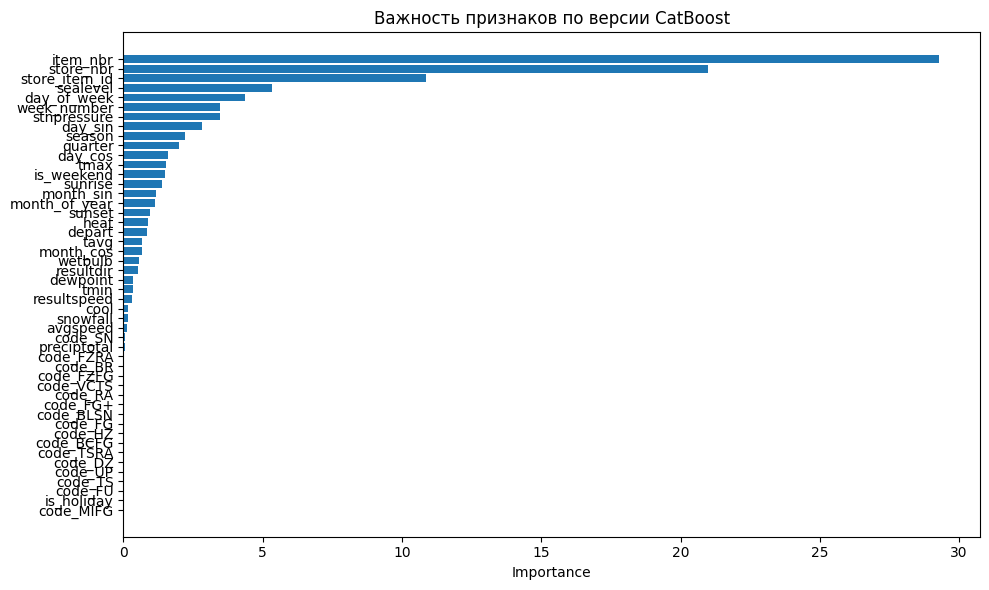

In [191]:
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Категориальные признаки
cat_features = ['store_nbr', 'item_nbr', 'month_of_year', 'day_of_week', 'quarter', 'season', "store_item_id"]

# Подготовка данных
features = column_names[:2] + column_names[3:]
X = train_df[features]
y = train_df['units']

# Временной сплит
tscv = TimeSeriesSplit(n_splits=3)

param_grid = {
    'depth': [9],
    'learning_rate': [0.01, 0.02],
    'l2_leaf_reg': [3],
    'iterations': [1500]
}


# Инициализация модели
model = CatBoostRegressor(
    cat_features=cat_features,
    verbose=100,
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=-1
)

# Запуск
grid_search.fit(X, y)

# Лучшая модель
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² (кросс-валидация):", grid_search.best_score_)

# Прогноз и R² на тесте
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
best_model.fit(X_train_val, y_train_val, use_best_model=True)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² на тестовой выборке: {r2:.4f}")

# Важность признаков
importances = best_model.get_feature_importance()
feature_importance_df = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values("importance", ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["feature"], feature_importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("Важность признаков по версии CatBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [192]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(1+y_test, 1+y_pred))


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"RMSLE: {rmsle:.4f}")

MAE: 15.35
RMSE: 23.26
R²: 0.6132
RMSLE: 0.5739
